# TO DO

1. Modify documents2bag_of_words method to return idx2word instead of word2idx
2. Show most important words (higher frenquency)

# Import Libraries

In [1]:
from brown import get_documents
from util import documents2bag_of_words

import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

# Load Corpus dataset

In [2]:
brown_documents= get_documents(verbose=True)

# Convert Corpus to BoW

In [3]:
BoW, word2idx=  documents2bag_of_words(brown_documents)

# Frequency of words by Document
BoW = pd.DataFrame(BoW)

# Presence of words by Document
BoW_unique = BoW.copy()
BoW_unique[BoW_unique > 0] = 1

document:499 of 499	docid:cr09	V:49642	WORD COUNT:687313


# Statistical Analysis

## Declare variables

In [74]:
decile = [(x + 1.0)/10.0 for x in range(9)]
percentile = [0.0 + (x + 1.0)/100.0 for x in range(100)]
permille = [0.00 + (x + 1.0)/1000.0 for x in range(1000)]
upper_percentile = [0.9 + (x + 1.0)/100.0 for x in range(9)]
lower_percentile = [0.0 + (x + 1.0)/100.0 for x in range(9)]
upper_permille = [0.99 + (x + 1.0)/1000.0 for x in range(9)]
lower_permille = [0.00 + (x + 1.0)/1000.0 for x in range(9)]

## Corpus size

In [5]:
rows, columns = BoW.shape
n_tokens = BoW.sum().sum()

print ('Total number of documents: %d' % (columns,))
print ('Total number of tokens: %d' % (n_tokens,))
print ('Vocabulary size: %d' % (rows,))

Total number of documents: 499
Total number of tokens: 687313
Vocabulary size: 49642


## Word frequency

In [75]:
total_word_count = BoW.sum(axis=1)
unique_word_count = BoW_unique.sum(axis=1)

# Cumulative Distribution
bins = total_word_count.quantile(permille).drop_duplicates().values
total_word_count_cut = pd.cut(total_word_count, bins=bins, right=True, include_lowest=True)

### Total

In [7]:
total_word_count.describe(percentiles=decile+upper_percentile)

count    49642.000000
mean        13.845393
std        236.206215
min          1.000000
10%          1.000000
20%          1.000000
30%          1.000000
40%          2.000000
50%          2.000000
60%          3.000000
70%          5.000000
80%          9.000000
90%         22.000000
91%         26.000000
92%         30.000000
93%         34.000000
94%         41.000000
95%         50.000000
96%         62.000000
97%         80.000000
98%        109.000000
99%        181.590000
max      48556.000000
dtype: float64

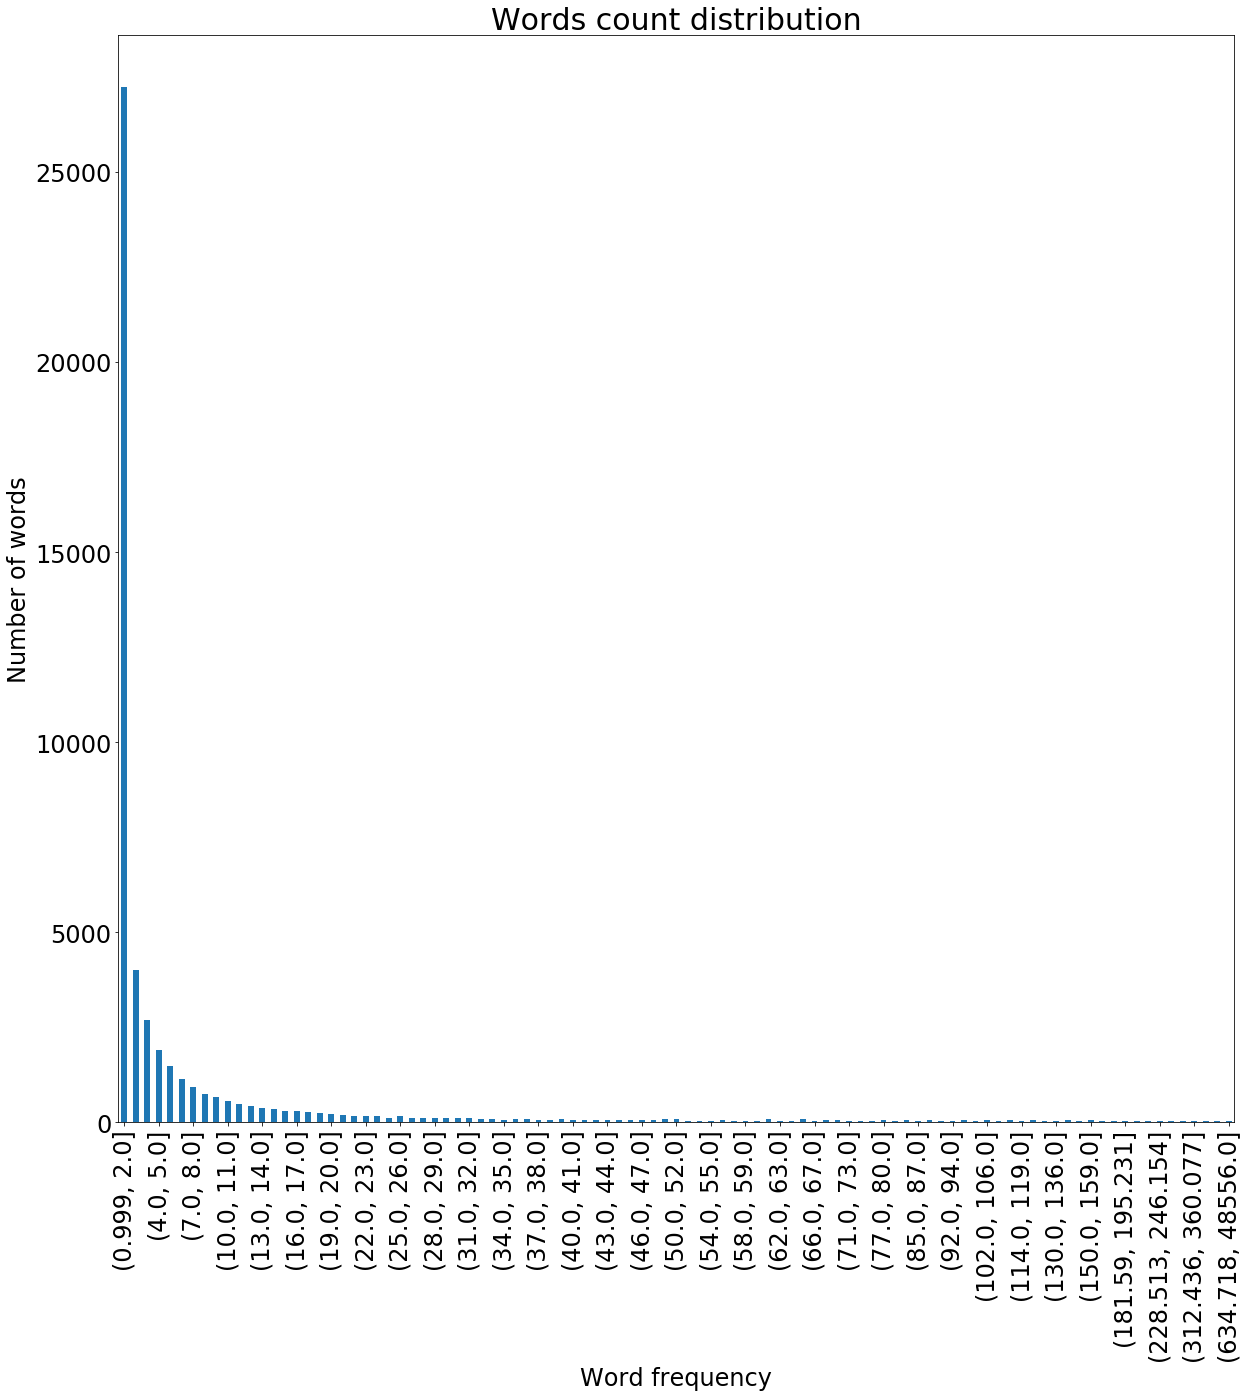

In [69]:
ax = total_word_count_cut.value_counts().sort_index().plot(kind='bar', figsize=(20,20), fontsize=24)

ax.set_title('Words count distribution', fontsize=30)
ax.set_ylabel('Number of words', fontsize=24)
ax.set_xlabel('Word frequency', fontsize=24)

n = 3
ticks = ax.xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
ax.xaxis.set_ticks(ticks[::n])
ax.xaxis.set_ticklabels(ticklabels[::n])

### Unique

In [70]:
unique_word_count.describe(percentiles=decile+upper_percentile)

count    49642.000000
mean         6.782704
std         21.455120
min          1.000000
10%          1.000000
20%          1.000000
30%          1.000000
40%          1.000000
50%          1.000000
60%          2.000000
70%          3.000000
80%          5.000000
90%         13.000000
91%         15.000000
92%         17.000000
93%         20.000000
94%         23.000000
95%         28.000000
96%         35.000000
97%         44.000000
98%         61.000000
99%         97.000000
max        499.000000
dtype: float64

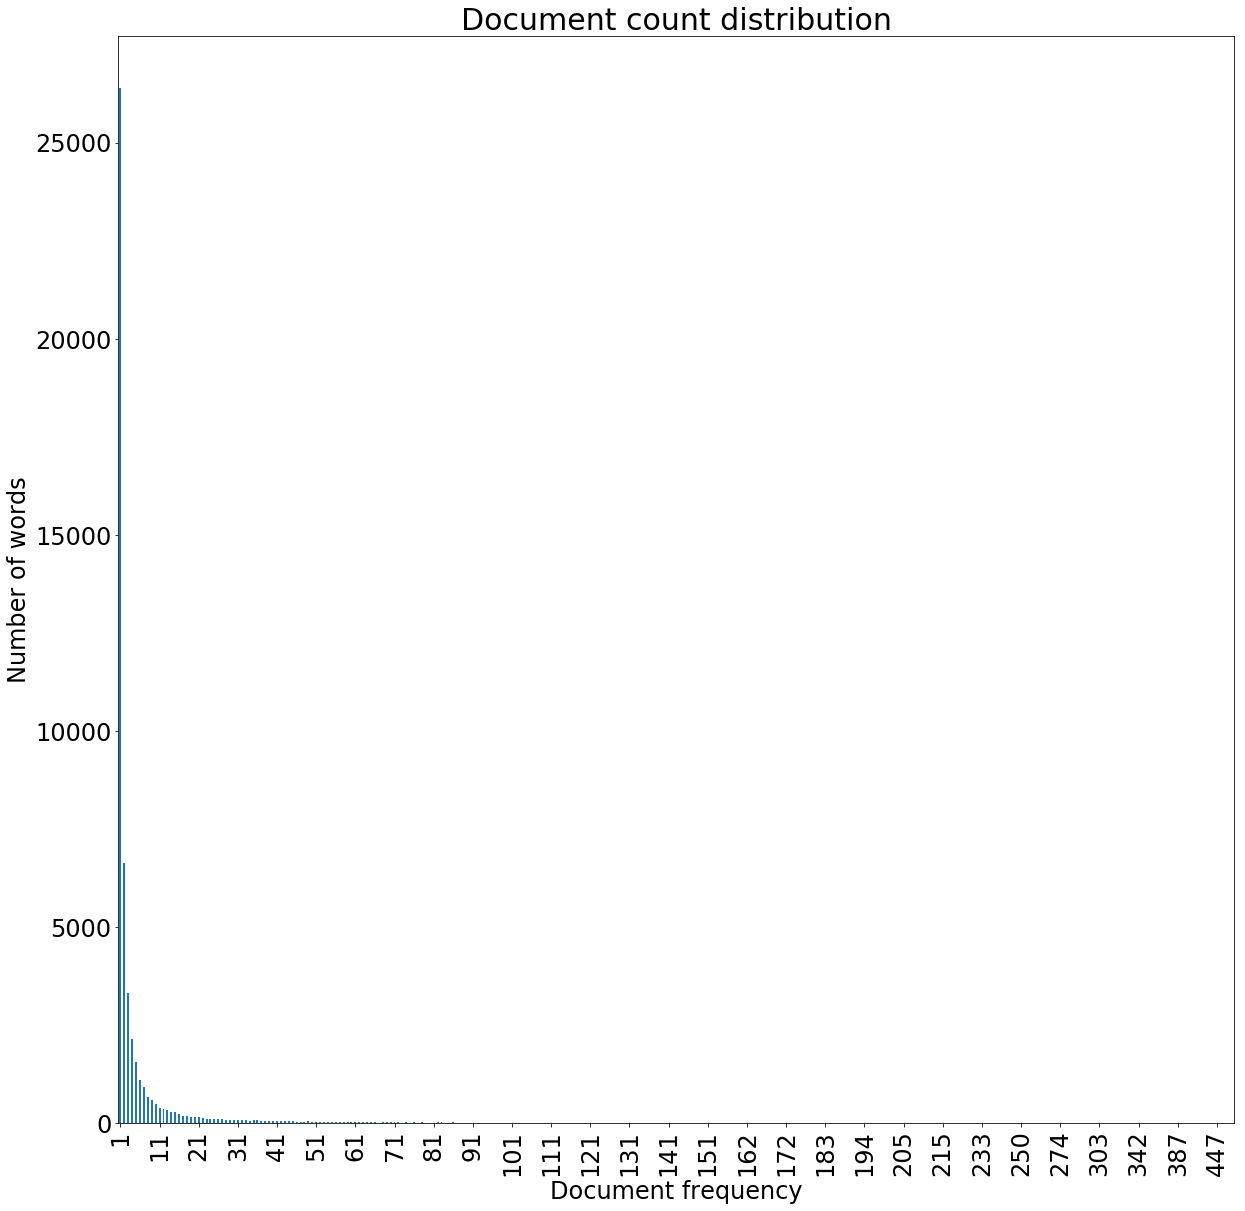

In [80]:
ax = unique_word_count.value_counts().sort_index().plot(kind='bar', figsize=(20,20), fontsize=24)

ax.set_title('Document count distribution', fontsize=30)
ax.set_ylabel('Number of words', fontsize=24)
ax.set_xlabel('Document frequency', fontsize=24)

n = 10
ticks = ax.xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
ax.xaxis.set_ticks(ticks[::n])
ax.xaxis.set_ticklabels(ticklabels[::n])

### Vocabulary % VS Corpus (in Tokens) %

In [81]:
cumulative_word_count = total_word_count.sort_values(ascending=False).cumsum()/n_tokens
cumulative_word_count.describe(percentiles=lower_permille + lower_percentile)

count    49642.000000
mean         0.908846
std          0.124081
min          0.070646
0.1%         0.191405
0.2%         0.229542
0.3%         0.258462
0.4%         0.282464
0.5%         0.303462
0.6%         0.322092
0.7%         0.339345
0.8%         0.355176
0.9%         0.369882
1%           0.383502
2%           0.484003
3%           0.551230
4%           0.601533
5%           0.641560
6%           0.674185
7.0%         0.701328
8%           0.724336
9%           0.744160
50%          0.956542
max          1.000000
dtype: float64

## Word count by Document

In [84]:
total_words_per_doc = BoW.sum(axis=0)
unique_words_per_doc = BoW_unique.sum(axis=0)

### Total

In [85]:
total_words_per_doc.describe(percentiles=decile)

count     499.000000
mean     1377.380762
std       107.243648
min      1076.000000
10%      1247.600000
20%      1292.000000
30%      1316.400000
40%      1343.000000
50%      1370.000000
60%      1401.000000
70%      1427.000000
80%      1465.400000
90%      1523.000000
max      1759.000000
dtype: float64

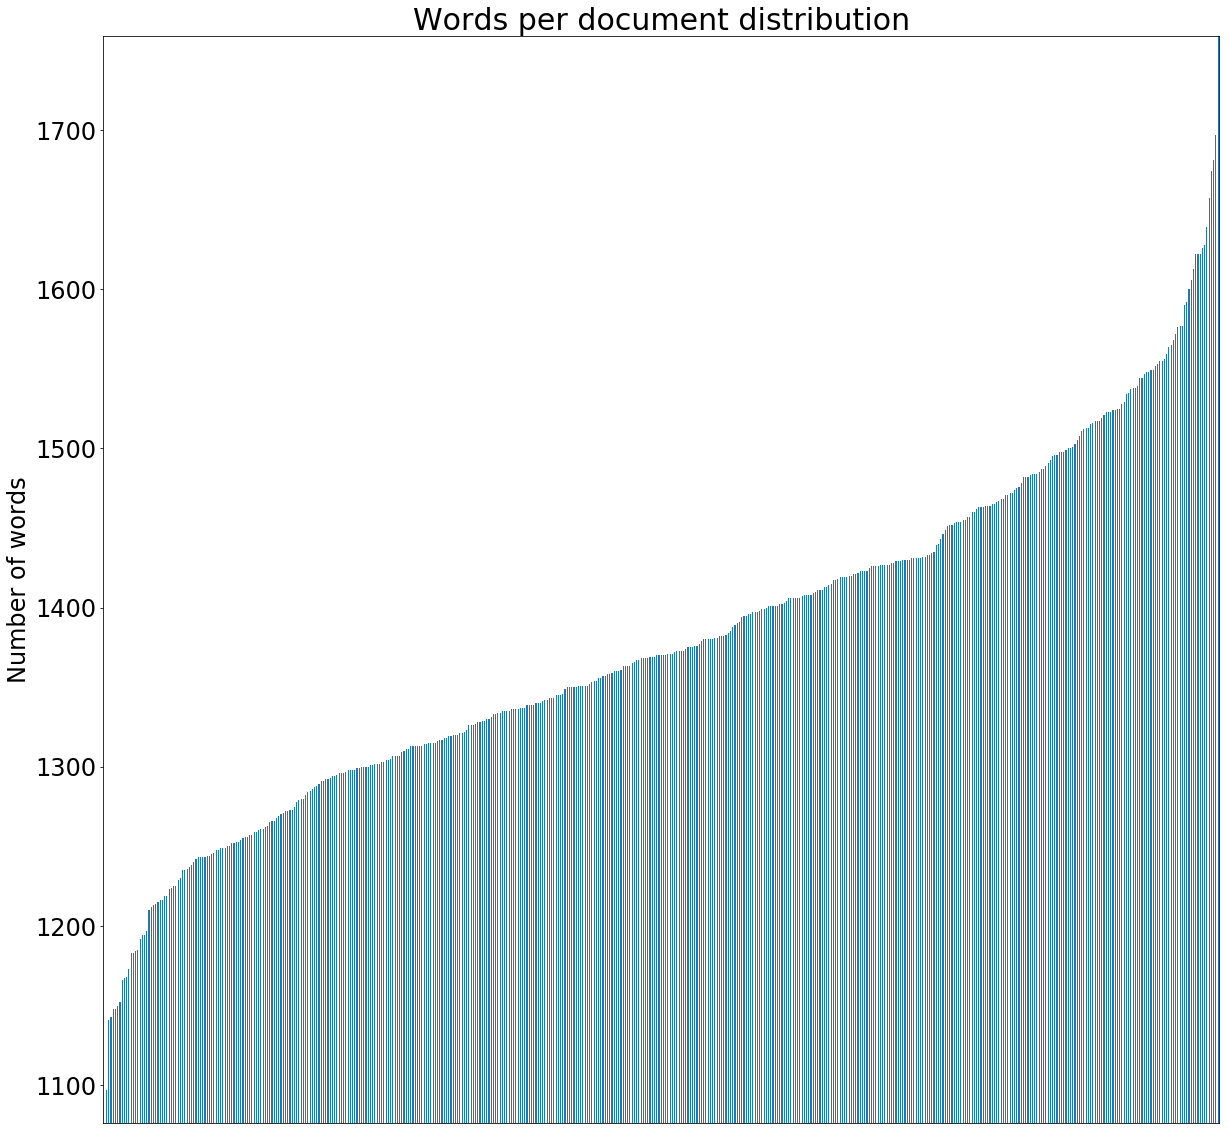

In [86]:
ylim =[min(total_words_per_doc), max(total_words_per_doc)]

ax = total_words_per_doc.sort_values().plot(kind='bar', figsize=(20,20), fontsize=24, ylim=ylim)

ax.set_title('Words per document distribution', fontsize=30)
ax.set_ylabel('Number of words', fontsize=24)
ax.get_xaxis().set_visible(False)

### Unique

In [87]:
unique_words_per_doc.describe(percentiles=decile)

count     499.000000
mean      674.763527
std       103.750222
min       238.000000
10%       558.000000
20%       597.600000
30%       625.000000
40%       656.000000
50%       682.000000
60%       705.000000
70%       726.000000
80%       754.400000
90%       804.200000
max      1042.000000
dtype: float64

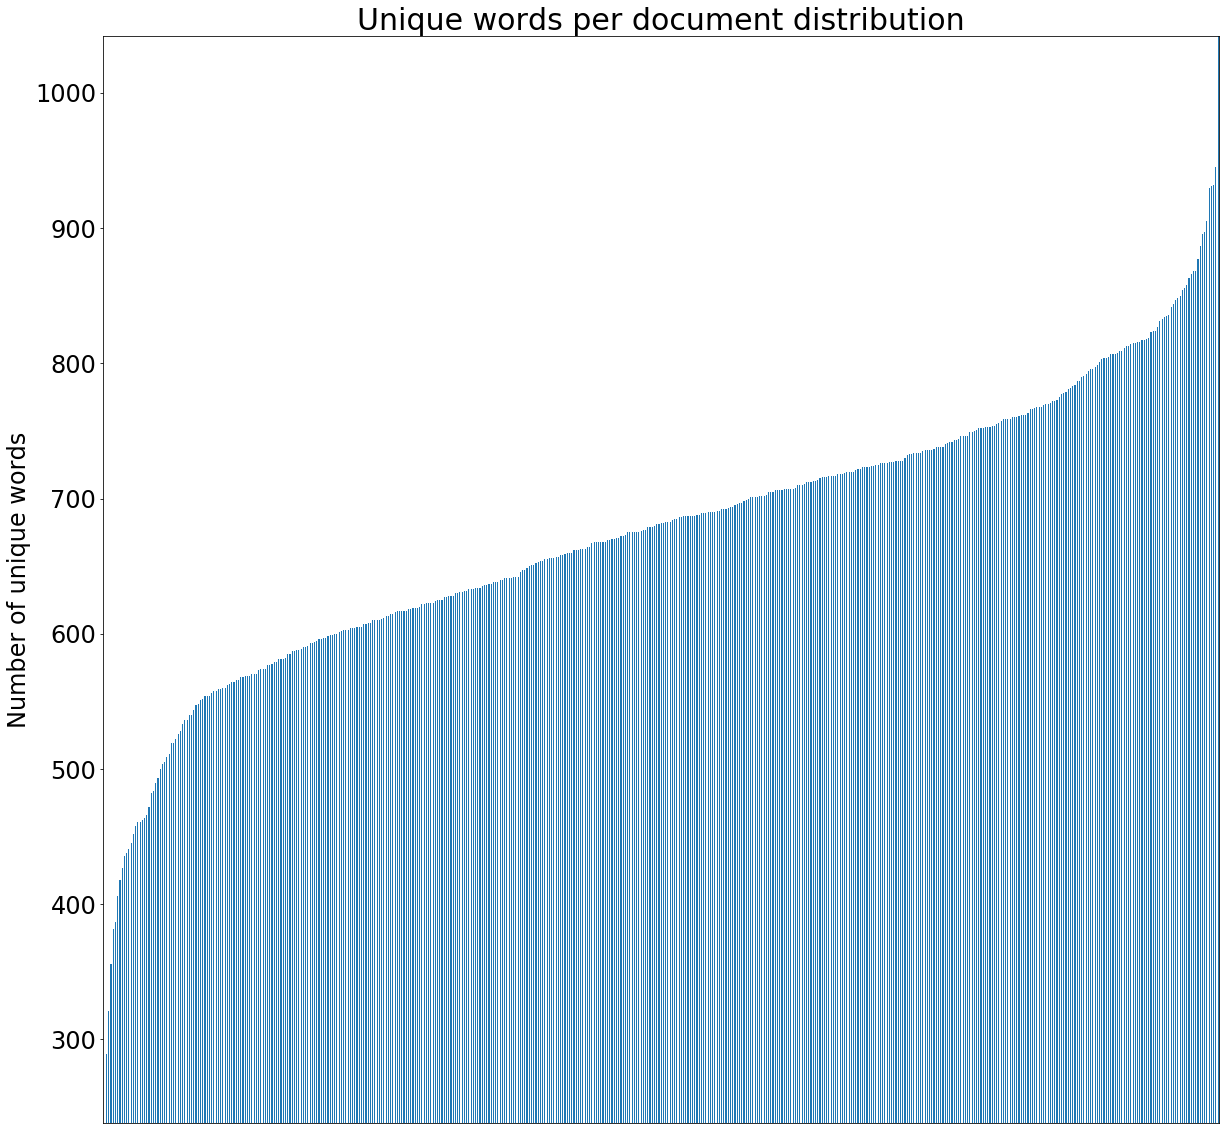

In [89]:
ylim =[min(unique_words_per_doc), max(unique_words_per_doc)]

ax = unique_words_per_doc.sort_values().plot(kind='bar', figsize=(20,20), fontsize=24, ylim=ylim)

ax.set_title('Unique words per document distribution', fontsize=30)
ax.set_ylabel('Number of unique words', fontsize=24)
ax.get_xaxis().set_visible(False)

# Working Area...